<a href="https://colab.research.google.com/github/Khachatryan10/Video-Sharing-Web-App/blob/main/CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-datasets
!pip install --upgrade keras
!pip install tensorflow-datasets

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets
import tensorflow_datasets as tfds
import os
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
EPOCHS = 50
BATCH_SIZE = 700

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "cifar10",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TAIPDW_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TAIPDW_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
classes = ["Airplane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
def rescale_images(image, label):
    image = tf.cast(image, "float32") / 255.0
    return image, label

In [ ]:
training_dataset = ds_train.map(rescale_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)
training_dataset = training_dataset.shuffle(ds_info.splits["train"].num_examples)
training_dataset = training_dataset.cache()
training_dataset = training_dataset.batch(BATCH_SIZE)
training_dataset = training_dataset.prefetch(tf.data.experimental.AUTOTUNE)

validation_dataset = ds_test.map(rescale_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
ds_info.splits["train"].num_examples

50000

In [ ]:

model = keras.Sequential([
    layers.InputLayer(shape=[32, 32, 3]),
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.05),
    layers.RandomContrast(factor=0.05),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    layers.Dropout(rate=0.20),


    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.004)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
history = model.fit(training_dataset, validation_data=validation_dataset, epochs=EPOCHS)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 35s 288ms/step - accuracy: 0.1556 - loss: 2.4234 - val_accuracy: 0.2094 - val_loss: 2.1803
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 226ms/step - accuracy: 0.3184 - loss: 1.7518 - val_accuracy: 0.1651 - val_loss: 3.9727
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.4781 - loss: 1.4337 - val_accuracy: 0.4339 - val_loss: 1.7202
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.5843 - loss: 1.1776 - val_accuracy: 0.6314 - val_loss: 1.0833
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.6478 - loss: 1.0048 - val_accuracy: 0.6481 - val_loss: 1.0610
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.6904 - loss: 0.8895 - val_accuracy: 0.7344 - val_loss: 0.7914
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.7307 - loss: 0.7802 - val_accuracy: 0.7303 - val_loss: 0.8786
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.7597 - loss: 0.7131 - val_accu

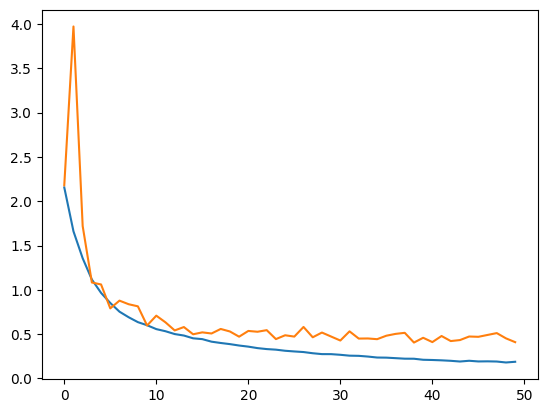

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
eval = model.evaluate(validation_dataset, batch_size=BATCH_SIZE)
pred = model.predict(validation_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8848 - loss: 0.4105
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [ ]:
for images, labels in validation_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


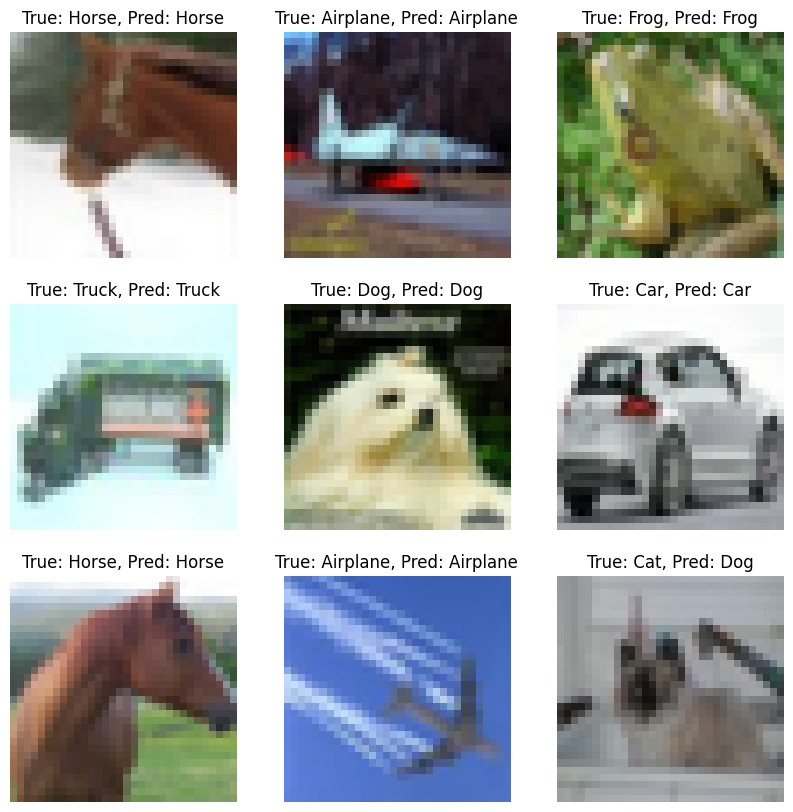

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"True: {classes[labels[i].numpy()]}, Pred: {classes[predicted_labels[i].numpy()]}")
    plt.axis('off')
plt.show()